In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from itertools import combinations 
from random import seed
from random import randint
import random
from sklearn.metrics import confusion_matrix

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_k(x,k):
    return 1 / (1 + k*np.exp(-z))

In [3]:
def relu(x):
    return np.log(1+np.exp(x))

In [4]:
#out_layer_act
def drelu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [5]:
def loss(out,Y):
        loss = (-1)*(np.sum(np.multiply(np.log(out), Y) + np.multiply((1 - Y), np.log(1 - out))))/(Y.shape[1])
        #print(loss)
        return loss

In [6]:
#testimg relu and sigmoid
#relu(5)
#relu(-3)
#relu(0)

#sigmoid(5)
#sigmoid(0)
#sigmoid(-4)

In [7]:
df_proc = pd.read_csv("preprocessed.csv") 

In [8]:
df_proc.columns=[0,1,2,3,4,5,6,7,8,9,10,11]

In [9]:
Y = df_proc.filter([11], axis=1)
X = df_proc.drop([0,1,11],axis=1)
XTrain,XTest,YTrain,YTest=train_test_split(X, Y, test_size=0.30, random_state=42)

In [10]:
def ann(X,Y,learning_rate):
    #taking all 9 layers as input
    in_layer_no=X.shape[0] #no of attributes
    hid_layer_no=int(2/3*in_layer_no)
    out_layer_no=1

    #initial weights
    wh = np.random.randn(hid_layer_no,in_layer_no) * 0.01
    bh = np.zeros(shape=(hid_layer_no, 1))
    w_out = np.random.randn(out_layer_no,hid_layer_no) * 0.01
    b_out = np.zeros(shape=(out_layer_no, 1))

    initial_weights=[wh,bh,w_out,b_out]
    dwh_old=0
    dw_out_old=0
    for i in range(0,20000):
        #forward propogation
        #input to hidden layer = dot product(X,wh) + bh
        hid_layer_input = np.dot(wh,X) + bh
        hid_layer_act = relu(hid_layer_input)
        
        # Final output layer prediction
        out_layer_input = np.dot(w_out,hid_layer_act) + b_out
        out_layer_act = sigmoid(out_layer_input)
        lo=loss(out_layer_act,Y)
        if(i%1000==0):
            print(i,lo)
        '''dZ2 = out_layer_act - Y
        dW2 = (1 /X.shape[1]) * np.dot(dZ2, hid_layer_act.T)
        db2 = (1 / X.shape[1]) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.multiply(np.dot(w_out.T, dZ2), 1 - np.power(hid_layer_act, 2))
        dW1 = (1 / X.shape[1]) * np.dot(dZ1, X.T)
        db1 = (1 / X.shape[1]) * np.sum(dZ1, axis=1, keepdims=True)
        
        wh = wh - learning_rate * dW1
        w_out = w_out - learning_rate * dW2
        bh = bh - learning_rate * db1
        b_out = b_out - learning_rate * db2
        '''
        #backward propogation output layer    
        t_o = out_layer_act - Y
        sigmak = t_o * sigmoid(out_layer_input)*(1-sigmoid(out_layer_input))   
        dLoss_W2 = (1/hid_layer_act.shape[1]) * np.dot(sigmak,hid_layer_act.T)
        dLoss_b2 = (1/hid_layer_act.shape[1]) * np.dot(sigmak, np.ones([sigmak.shape[1],1])) 
          
        #backward propogation input layer
        dLoss_A1 = np.dot(w_out.T,sigmak)
        dLoss_Z1 = dLoss_A1 * drelu(hid_layer_input)        
        dLoss_A0 = np.dot(wh.T,dLoss_Z1)
        dLoss_W1 = 1/X.shape[1] * np.dot(dLoss_Z1,X.T)
        dLoss_b1 = 1/X.shape[1] * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1],1]))  
        
        wh = wh - learning_rate * dLoss_W1
        w_out = w_out - learning_rate * dLoss_W2
        bh = bh - learning_rate * dLoss_b1
        b_out = b_out - learning_rate * dLoss_b2
    return [wh,bh,w_out,b_out]
    ''' 
        #backpropogation
        dout_layer_act = (out_layer_act - Y) / (out_layer_act * (1 - out_layer_act))
        dZ2 = np.multiply(dout_layer_act, out_layer_act * (1 - out_layer_act))
        dw_out = np.dot(dZ2, hid_layer_act.T)
        #dw_out=dw_out+0.5*dw_out_old
        #dw_out_old=dw_out
        db_out = np.sum(dZ2, axis=1, keepdims=True)

        dhid_layer_act = np.dot(w_out.T, dZ2)
        dZ1 = np.multiply(dhid_layer_act, dhid_layer_act * (1 - dhid_layer_act))
        dwh = np.dot(dZ1, X.T)
        #dwh=dwh+0.2*dwh_old
        #dwh_old=dwh
        dbh = np.sum(dZ1, axis=1, keepdims=True)
        
        wh = wh - learning_rate * dwh
        w_out = w_out - learning_rate * dw_out
        bh = bh - learning_rate * dbh
        b_out = b_out - learning_rate * db_out
    '''
        
        

In [11]:
#final forward propogation to test trained model 
def predict(XTrain,YTrain,XTest,YTest,learning_rate):
    final_weights=ann(XTrain,YTrain,learning_rate)
    hid_layer_input = np.dot(final_weights[0],XTest) + final_weights[1]
    hid_layer_act = relu(hid_layer_input)
    out_layer_input = np.dot(final_weights[2],hid_layer_act) + final_weights[3]
    out_layer_act = sigmoid(out_layer_input)
    predictions = out_layer_act > 0.5
    predictions=predictions.astype(int)
    #print(type(predictions),predictions.shape)
    accuracy=float((np.dot(YTest,predictions.T) + np.dot(1-YTest,1-predictions.T))/float(YTest.size)*100)
    #print(accuracy)
    #print ('Accuracy: %f' % float((np.dot(YTest,predictions.T) + np.dot(1-YTest,1-predictions.T))/float(YTest.size)*100) + '%')
    return [accuracy,predictions]

In [12]:
def split_test_train(XTrain,XTest,YTrain,YTest):
    #print(X.shape,Y.shape)
    #X,Y=X.to_numpy(),Y.to_numpy()
    XTrain,XTest,YTrain,YTest= XTrain.to_numpy().T,XTest.to_numpy().T,YTrain.to_numpy().reshape(1, YTrain.shape[0]),YTest.to_numpy().reshape(1, YTest.shape[0])
    #X,Y=X.T,Y.reshape(1, Y.shape[0])
    #print(X.shape,Y.shape,XTrain.shape,YTrain.shape,XTest.shape,YTest.shape)
    res=predict(XTrain,YTrain,XTest,YTest,0.05)
    return res


In [32]:
def rSubset(arr,r): 
    return list(combinations(arr, r)) 
def comb(r):
    arr = [2,3,4,5,6,7,8,9,10] 
    return(rSubset(arr, r))
def att_bagg(r,XTrain,XTest,YTrain,YTest):
    s=comb(r)
    #print(s,len(s))
    length=len(s)
    inner_acc=[]
    #repeat 10 times
    for i in range(0,3):
        #9 random values
        rand_index=random.sample(range(0, length), 5)
        #print(rand_index)
        l=[]
        for j in rand_index:
            t=s[j]
            #print(t,X,type(X))
            new_dataset_train = XTrain.loc[:,list(t)]
            new_dataset_test=XTest.loc[:,list(t)]
            #print(new_dataset)
            res=split_test_train(new_dataset_train,new_dataset_test,YTrain,YTest)
            l.append(res)
        #print(l)
        l.sort(key=lambda x:x[0],reverse=True)
        #print(l)
        top=l[0:3]
        top=list(map(lambda x: [x[0],x[1][0].tolist()],top))
        #print(top[0][1])
        votes=list(zip(top[0][1],top[1][1],top[2][1]))
        #print(final_pred)
        final_predictions=list(map(lambda x:max(set(list(x)), key = list(x).count),votes))
        temp=[]
        temp.append(final_predictions)
        final_predictions=np.asarray(temp)
        #print(type(final_predictions),final_predictions.shape)
        ytemp_test=YTest.to_numpy().reshape(1, YTest.shape[0])
        #final_predictions=final_predictions.astype(int)  
        accuracy=float((np.dot(ytemp_test,final_predictions.T) + np.dot(1-ytemp_test,1-final_predictions.T))/float(ytemp_test.size)*100)
        inner_acc.append([accuracy,final_predictions])
        #print(inner_acc)
        #print(final_predictions,len(final_predictions),len(YTest))
        #avg1=max(l) 
        #avg.append(avg1)
    ytemp_test=YTest.to_numpy().reshape(1, YTest.shape[0])
    inner_acc.sort(key=lambda x:x[0],reverse=True)
    #print(inner_acc)
    final_bag=inner_acc[1]
    return confusion_matrix(ytemp_test[0], final_bag[1][0]),final_bag[0]
#conf_mat,acc=att_bagg(5,XTrain,XTest,YTrain,YTest)

0 0.6976149463921342
1000 0.6434651594881544
2000 0.6235806489007484
3000 0.5748079301690502
4000 0.48909769192182107
5000 0.39099303186136386
6000 0.3170915320891471
7000 0.2700085683840143
8000 0.24162375888204035
9000 0.222597744663428
10000 0.20905011495430953
11000 0.19902010690043379
12000 0.1917550744731809
13000 0.18616640637389498
14000 0.18155492759708103
15000 0.17759511427865635
16000 0.1744136526346047
17000 0.17161150699555305
18000 0.16940806014069168
19000 0.16765071006255022
<class 'numpy.ndarray'> (1, 210)
0 0.6929696553720635
1000 0.6434860522418065
2000 0.613429773867946
3000 0.5172744159158785
4000 0.371304556394606
5000 0.26931036025297467
6000 0.21786601832055486
7000 0.1910239310705792
8000 0.17399725084788614
9000 0.16234818564306946
10000 0.1544079358068899
11000 0.14859884266376827
12000 0.14395077716406748
13000 0.13981832420650184
14000 0.13645827026693078
15000 0.13397872248470058
16000 0.1325709837154365
17000 0.13065676898679565
18000 0.1288976025713391


In [33]:
#pick 9 randomly 
#and test 9 , 30 times
#increase randomnesss
acc

97.14285714285714

In [34]:
total=[]
for i in range(2,10):
    conf_mat,acc=att_bagg(i,XTrain,XTest,YTrain,YTest)
    print(conf_mat)
    total.append(acc)
keys=[2,3,4,5,6,7,8,9]
dictionary = dict(zip(keys, total))
plt.plot(*zip(*sorted(dictionary .items())))
plt.show()

0 0.6927250662215484
1000 0.6447365862316884
2000 0.6207094851037155
3000 0.5502335774354047
4000 0.4371130444428178
5000 0.3430210947955077
6000 0.28687883534833936
7000 0.2535643724263338
8000 0.23281329596593067
9000 0.21887647381271894
10000 0.2093290774029019
11000 0.20246063735645983
12000 0.19708975398454234
13000 0.19336761484191403
14000 0.18886235615108282
15000 0.185995403513638
16000 0.1837427746096639
17000 0.18141410993952115
18000 0.17934943583257235
19000 0.17803855518271128
<class 'numpy.ndarray'> (1, 210)
0 0.6932394765115716
1000 0.6509645305299162
2000 0.6509529388055458
3000 0.6509528592306122
4000 0.6509527858530437
5000 0.650952712508354
6000 0.6509526391643073
7000 0.650952565820286
8000 0.6509524924762768
9000 0.65095241913228
10000 0.6509523457882952
11000 0.6509522724443226
12000 0.6509521991003622
13000 0.650952125756414
14000 0.6509520524124778
15000 0.6509519790685536
16000 0.6509519057246418
17000 0.6509518323807422
18000 0.6509517590368546
19000 0.650951

14000 0.12838894912042645
15000 0.12626703030402534
16000 0.1245551326291542
17000 0.12306978943199968
18000 0.12176832516230475
19000 0.12054505119924284
<class 'numpy.ndarray'> (1, 210)
0 0.6924493907974041
1000 0.6398200246136574
2000 0.6037207781821444
3000 0.5146091878908443
4000 0.38838433278134915
5000 0.2937190092862866
6000 0.2383362369174866
7000 0.20579232582066107
8000 0.18355910388873847
9000 0.1680408628352364
10000 0.15727131414416637
11000 0.14903215458538951
12000 0.14274074377283877
13000 0.13778028426078087
14000 0.1336270329845738
15000 0.13048597775768003
16000 0.12787404016159215
17000 0.12561372027806156
18000 0.12364285885368051
19000 0.12180760248592122
<class 'numpy.ndarray'> (1, 210)
0 0.6928962201843671
1000 0.6506134073253824
2000 0.6506035739110942
3000 0.6505949901676217
4000 0.6505864085114054
5000 0.6505778271131395
6000 0.6505692459620713
7000 0.6505606650581385
8000 0.6505520844013409
9000 0.6505435039916807
10000 0.6505349238291588
11000 0.6505263439

4000 0.310687938183791
5000 0.2281399558975843
6000 0.18963371368921123
7000 0.16795270541625548
8000 0.15459178932604342
9000 0.14527405406696028
10000 0.13837434626863698
11000 0.13311148256125876
12000 0.12926297279587878
13000 0.1263065189813984
14000 0.12391410525870278
15000 0.12164873679290282
16000 0.12004608172598065
17000 0.11867529250626194
18000 0.1173448653446322
19000 0.11629770373311986
<class 'numpy.ndarray'> (1, 210)
0 0.6931514924651077
1000 0.645046455717512
2000 0.6170405210859876
3000 0.5128708006034837
4000 0.3537441706220923
5000 0.261073900340095
6000 0.21818501566459883
7000 0.19609976021027092
8000 0.1830816248342865
9000 0.17438252147149336
10000 0.16801313967215753
11000 0.16316891662601385
12000 0.15913297962359993
13000 0.15618816689141407
14000 0.15376121604597626
15000 0.15172830418683894
16000 0.15000534631031284
17000 0.14853064687789716
18000 0.14725785349274445
19000 0.1461514291226672
<class 'numpy.ndarray'> (1, 210)
0 0.6944513880870239
1000 0.6394

14000 0.11426425746043756
15000 0.11163551733662153
16000 0.10928108040883558
17000 0.10730803903572558
18000 0.10562516506399507
19000 0.10421336240209145
<class 'numpy.ndarray'> (1, 210)
0 0.6942725171519692
1000 0.6388640348954004
2000 0.6008036915672749
3000 0.5094210016506021
4000 0.38368491353762035
5000 0.289279897984315
6000 0.23330144252815171
7000 0.1992100112371491
8000 0.17604426985064475
9000 0.16114819247394838
10000 0.1502783999095705
11000 0.14235377201621602
12000 0.13642229622630783
13000 0.13200979031389157
14000 0.12839685331133704
15000 0.12526726758988388
16000 0.12275890619883668
17000 0.12087383567293097
18000 0.11883205768747392
19000 0.11693573370378028
<class 'numpy.ndarray'> (1, 210)
0 0.6905114681088828
1000 0.6450693728053466
2000 0.6062332921365537
3000 0.4415258447400812
4000 0.2675681357525569
5000 0.1935666804014976
6000 0.1601916080723364
7000 0.14175388128451397
8000 0.13065670828134304
9000 0.12342762752355162
10000 0.1180113043681181
11000 0.113868

2000 0.611460928636082
3000 0.4887302074676687
4000 0.21670837806099202
5000 0.15447993712883912
6000 0.13335107714596134
7000 0.12269879914767104
8000 0.11627510263247251
9000 0.11202412679734171
10000 0.10906707071707486
11000 0.10684576111242822
12000 0.10536987231732199
13000 0.1041647151997207
14000 0.10333937940018216
15000 0.10278632038021783
16000 0.10209126967396447
17000 0.10145625229464268
18000 0.10088908764069604
19000 0.10044598282774478
<class 'numpy.ndarray'> (1, 210)
0 0.6951248655727572
1000 0.639751349265307
2000 0.6052630289145039
3000 0.5122321317078578
4000 0.3643601006639701
5000 0.2506507300110383
6000 0.18945135953664455
7000 0.15571051216759493
8000 0.13608015787611458
9000 0.12410524758036756
10000 0.11632205930641751
11000 0.11095467439832356
12000 0.1071391021580361
13000 0.10429326170076049
14000 0.1020560022064772
15000 0.10028800492650869
16000 0.09883137938351502
17000 0.09771993638148292
18000 0.09685767235428878
19000 0.09586267984716154
<class 'numpy

11000 0.12319018891813927
12000 0.12036010651697374
13000 0.11780787440784142
14000 0.11596855728253733
15000 0.11440457345436911
16000 0.1128862506588463
17000 0.11168654975041883
18000 0.11067429646159846
19000 0.10977180254668994
<class 'numpy.ndarray'> (1, 210)
0 0.6912854690398132
1000 0.6405324519117349
2000 0.5952306867744198
3000 0.45986316201668925
4000 0.2994869759675666
5000 0.21437295904699938
6000 0.17105904615424705
7000 0.14851027408500433
8000 0.13530252224554912
9000 0.12653173582594726
10000 0.12066772718959694
11000 0.1166936930452607
12000 0.11383871727988519
13000 0.11122304731400652
14000 0.10926064270331169
15000 0.10760567203169831
16000 0.10606353170946038
17000 0.10483537799675947
18000 0.10384822113670572
19000 0.1029827263907055
<class 'numpy.ndarray'> (1, 210)
0 0.6921724921355692
1000 0.6379929198343802
2000 0.6003149173966474
3000 0.5113343459654364
4000 0.38315602155816114
5000 0.28041250733061845
6000 0.2189141834891318
7000 0.17964708026110834
8000 0.1

19000 0.10149455171192075
<class 'numpy.ndarray'> (1, 210)
0 0.6925760177215318
1000 0.638122469867896
2000 0.6023057179367578
3000 0.5163270234738628
4000 0.38049887194005627
5000 0.26875144845985277
6000 0.20422037769086113
7000 0.16489845448010987
8000 0.14141673725000187
9000 0.12699735649024751
10000 0.11756176307849463
11000 0.11113864007187833
12000 0.1063276682765746
13000 0.10283830618653474
14000 0.10023850090186545
15000 0.09809005725842558
16000 0.09642263836512398
17000 0.09495755352069613
18000 0.09367111752524397
19000 0.09265716335663364
<class 'numpy.ndarray'> (1, 210)
0 0.6919783382257054
1000 0.6382207306928114
2000 0.6008911766186406
3000 0.5061268709852513
4000 0.350060513618015
5000 0.2015220507196206
6000 0.1459093345938256
7000 0.12591976682106973
8000 0.11595739782222696
9000 0.11001620710508368
10000 0.10605513320798207
11000 0.10302077263350432
12000 0.10078663909226464
13000 0.09897935395886355
14000 0.09753235044214464
15000 0.0963663880755242
16000 0.09554

ValueError: Sample larger than population or is negative

In [35]:
total=[]
conf_mat,acc=att_bagg(2,XTrain,XTest,YTrain,YTest)
total.append(acc)
print(conf_mat)

0 0.6934529910940188
1000 0.6508702149392183
2000 0.6508568212967168
3000 0.6508553372644825
4000 0.6508538649569571
5000 0.6508523927997689
6000 0.6508509206503955
7000 0.650849448505938
8000 0.6508479763663371
9000 0.6508465042315907
10000 0.6508450321016997
11000 0.6508435599766635
12000 0.6508420878564825
13000 0.6508406157411565
14000 0.6508391436306853
15000 0.6508376715250693
16000 0.6508361994243086
17000 0.6508347273284028
18000 0.6508332552373522
19000 0.6508317831511568
<class 'numpy.ndarray'> (1, 210)
0 0.6955936786338273
1000 0.6509805403327285
2000 0.6509685087738535
3000 0.6509684881384977
4000 0.6509684730648181
5000 0.6509684580066346
6000 0.6509684429487274
7000 0.6509684278908263
8000 0.6509684128329262
9000 0.6509683977750267
10000 0.6509683827171283
11000 0.6509683676592307
12000 0.6509683526013337
13000 0.6509683375434376
14000 0.6509683224855425
15000 0.6509683074276481
16000 0.6509682923697545
17000 0.6509682773118616
18000 0.6509682622539696
19000 0.65096824719

In [36]:
conf_mat,acc=att_bagg(3,XTrain,XTest,YTrain,YTest)
total.append(acc)
print(conf_mat)

0 0.6952921398359739
1000 0.6472437242305458
2000 0.6343915322474116
3000 0.5879692058188167
4000 0.48158181055163873
5000 0.3677782326456816
6000 0.29640890165125283
7000 0.25742804669819486
8000 0.2337111846895705
9000 0.21910748424988613
10000 0.20912201582799808
11000 0.2015461131671333
12000 0.19619644274858353
13000 0.19223362760020712
14000 0.1888291139360736
15000 0.18561176799132448
16000 0.18302638537945057
17000 0.181166717505807
18000 0.17972101711254332
19000 0.1785107706988815
<class 'numpy.ndarray'> (1, 210)
0 0.6947245681689443
1000 0.6411749843750806
2000 0.6082703743548965
3000 0.5239365805323245
4000 0.39825476128694115
5000 0.29972030320822307
6000 0.24168372684375153
7000 0.20796923296145392
8000 0.1851278772944667
9000 0.16907155977227706
10000 0.15802164294947074
11000 0.14962356501624755
12000 0.14321033391514484
13000 0.1381728269493791
14000 0.1339364575991967
15000 0.13071361689299368
16000 0.12807036871412522
17000 0.1257848699088634
18000 0.1237930473910785

In [37]:
conf_mat,acc=att_bagg(4,XTrain,XTest,YTrain,YTest)
total.append(acc)
print(conf_mat)

0 0.6911861822379194
1000 0.6409364849898984
2000 0.6091539678128364
3000 0.5291353552782426
4000 0.4098934063216146
5000 0.31668678291285507
6000 0.2588476203670826
7000 0.2234917381657222
8000 0.19958551149167003
9000 0.1831702597547343
10000 0.17189350896995306
11000 0.1638134328764337
12000 0.1575375539394424
13000 0.15279690092434103
14000 0.1491509078918658
15000 0.1462719323149817
16000 0.1439490084980351
17000 0.14198594491892497
18000 0.1403259012222308
19000 0.13893595764490324
<class 'numpy.ndarray'> (1, 210)
0 0.6940419393417011
1000 0.6417484252950074
2000 0.6128107245927982
3000 0.5368225450521281
4000 0.4196688384087208
5000 0.3207169620569954
6000 0.2609130825231659
7000 0.2263306771922242
8000 0.20385625100434546
9000 0.18885157123736845
10000 0.1785380001578715
11000 0.17088583847101244
12000 0.165178050655107
13000 0.16065283858535284
14000 0.1571120225738085
15000 0.1542342440563615
16000 0.1518501593453864
17000 0.14984425331718917
18000 0.1481407317740228
19000 0.

In [38]:
conf_mat,acc=att_bagg(5,XTrain,XTest,YTrain,YTest)
total.append(acc)
print(conf_mat)

0 0.6933344993094899
1000 0.6412162053844823
2000 0.6150884590311007
3000 0.5518603312164408
4000 0.4461959512881893
5000 0.3458318539692066
6000 0.27835850324793643
7000 0.23787363551865887
8000 0.21294878836327213
9000 0.19687677110536658
10000 0.18527944641166877
11000 0.17679763443080776
12000 0.17038454681673942
13000 0.165260400897903
14000 0.16105180133972205
15000 0.1576319128454616
16000 0.1546410319105475
17000 0.15216548710434163
18000 0.1501313692859742
19000 0.1485331317199347
<class 'numpy.ndarray'> (1, 210)
0 0.6922578850651958
1000 0.6366618494156379
2000 0.5919664681493223
3000 0.4863953775575756
4000 0.3556130149341702
5000 0.26620862801788064
6000 0.21341687736760256
7000 0.18487468500984278
8000 0.16667220519031656
9000 0.15456046564053463
10000 0.14598161517530223
11000 0.13951241834814296
12000 0.1347933827437173
13000 0.13107326215580312
14000 0.12804851128928188
15000 0.1255268579784963
16000 0.12334580884324163
17000 0.12144191711881225
18000 0.1197675017538762

In [39]:
conf_mat,acc=att_bagg(6,XTrain,XTest,YTrain,YTest)
total.append(acc)
print(conf_mat)

0 0.6940334440866919
1000 0.6390246583578166
2000 0.5910485804924904
3000 0.4606086500626545
4000 0.3140813523465495
5000 0.23249865817893556
6000 0.19023242262943196
7000 0.1681937184437871
8000 0.1554012336216085
9000 0.147016017550146
10000 0.1409047892430731
11000 0.13613882545086925
12000 0.13241860163983996
13000 0.12935429635662252
14000 0.12689267551292752
15000 0.12485175112529386
16000 0.1227791828514337
17000 0.1213342563522585
18000 0.12003727228225293
19000 0.11877301320713697
<class 'numpy.ndarray'> (1, 210)
0 0.6911357036983138
1000 0.6385712632393893
2000 0.6030827403343723
3000 0.5186399742058443
4000 0.39441299109314276
5000 0.289727683179916
6000 0.22327297380863012
7000 0.18640079498743148
8000 0.1635010001450699
9000 0.14741233842885257
10000 0.13545262195297708
11000 0.12606485777750848
12000 0.11838796402194621
13000 0.11263885978654052
14000 0.10839993249717443
15000 0.10509446277120167
16000 0.10245339973684997
17000 0.10035617994893734
18000 0.0986217316874405

In [40]:
conf_mat,acc=att_bagg(7,XTrain,XTest,YTrain,YTest)
total.append(acc)
print(conf_mat)

0 0.69371196835902
1000 0.6400522766791013
2000 0.6097182040646533
3000 0.5343513093510238
4000 0.4129133752288383
5000 0.30104943922518607
6000 0.22096157053188065
7000 0.1693418277993747
8000 0.14237002552291783
9000 0.12757828602750199
10000 0.11851823109342749
11000 0.1121239878907466
12000 0.10761179794469705
13000 0.10437032957340164
14000 0.10183450916710679
15000 0.09980017129812727
16000 0.09813672800145751
17000 0.09680140863414334
18000 0.09574110746208737
19000 0.09465116899075822
<class 'numpy.ndarray'> (1, 210)
0 0.6936730263393543
1000 0.6381758647022512
2000 0.6011477982723938
3000 0.5149011940347908
4000 0.39142041324783095
5000 0.2890611245840104
6000 0.23079824161813117
7000 0.19583379584056262
8000 0.17384942876605583
9000 0.15761378805853368
10000 0.14608799361733443
11000 0.1373400169562823
12000 0.13116967770553778
13000 0.12656376502347802
14000 0.12303295970547075
15000 0.1201061638319453
16000 0.11758003773451617
17000 0.11534242714433826
18000 0.1133938453931

In [41]:
conf_mat,acc=att_bagg(8,XTrain,XTest,YTrain,YTest)
total.append(acc)
print(conf_mat)

0 0.6922306984982892
1000 0.6394091076599561
2000 0.6036587706198556
3000 0.4679911819857365
4000 0.1890683574943163
5000 0.13855430128188448
6000 0.12174253014842334
7000 0.11321518838956027
8000 0.10793319125713563
9000 0.10432130295891243
10000 0.10159923608013395
11000 0.09955208754994124
12000 0.09794448860472182
13000 0.09663397565990907
14000 0.09552245874876439
15000 0.0946508236560373
16000 0.09394056192066794
17000 0.09334469679994645
18000 0.09284062222853048
19000 0.09237285365344387
<class 'numpy.ndarray'> (1, 210)
0 0.692567193702188
1000 0.6396033309423593
2000 0.6077121538224529
3000 0.5282348856255509
4000 0.3984458685913913
5000 0.28147482196217893
6000 0.20302082387795212
7000 0.15597275904945448
8000 0.13205052281466637
9000 0.11938427181301078
10000 0.11159241614900531
11000 0.1065016212915944
12000 0.10294590441765604
13000 0.1001494046930437
14000 0.09802609055371315
15000 0.09636507684844596
16000 0.09492469975532379
17000 0.09381286701693034
18000 0.09285496985

In [42]:
conf_mat,acc=att_bagg(9,XTrain,XTest,YTrain,YTest)
total.append(acc)
print(conf_mat)

ValueError: Sample larger than population or is negative

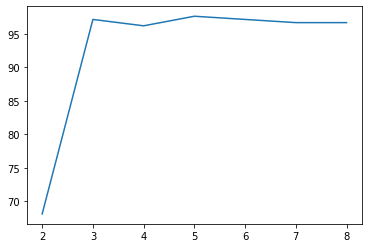

In [43]:
keys=[2,3,4,5,6,7,8]
dictionary = dict(zip(keys, total))
plt.plot(*zip(*sorted(dictionary .items())))
plt.show()